Import necessary packages.

In [6]:
# import all functions from python labrary: sympy
from sympy import *
# import python library: matplotlib (for nice plots)
import matplotlib
# set sympy output to print pretty math expressions
init_printing()

Declare variables we are going to use as 'symbols'. We will add more along the way, if necessary.

In [7]:
### NOTE: it is important here to further declare these variables to be nonzero and positive (otherwise sympy cannot find solution for the FOCs)
#    Thanks to Abhi Agarwal for discovering this trick
L, K, w, r, qbar = symbols('L K w r \overline{q}', nonzero=True, positive=True)

# Solve for cost-minimizing input bundle analytically

## Setup the optimization program

The production manager's optimization problem is
\begin{align}
    & \min_{L,K} \quad wL + rK \\
    \text{s.t.}\quad & L^{\alpha} K^{\beta} = \overline{q}
\end{align}

## Setup the utility function

In [9]:
### Note that it is important here to further declare these variables to be nonzero and positive
#    Thanks to Abhi Agarwal for discovering this trick
alpha, beta = symbols('alpha, beta',nonzero=True, positive=True)


# Note: in sympy syntax: use double star ** for power
q = L**(alpha) * K**(beta)
# show the defined function
q

## Setup the lagrangian

In [10]:
lam = symbols('lambda')
lagr = w*L + r*K + lam *(qbar - q)
lagr

Solve the first-order conditions. 

Note the syntax of the solve function, especially the use of the brackets:
solve( (eq1, eq2, eq3), var1, var2, var3)

The equations are by default treated as equal to 0 by the solver.

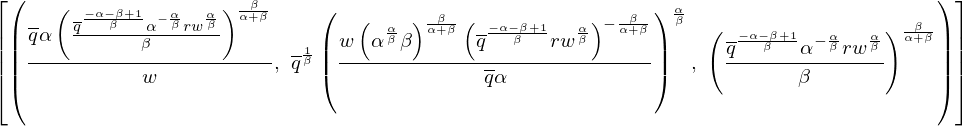

In [11]:
foc_sol = solve( ( diff(lagr,L), diff(lagr,K), diff(lagr,lam) ), [L,K,lam])
foc_sol

The solution is a list with one element, because our solution is unique.

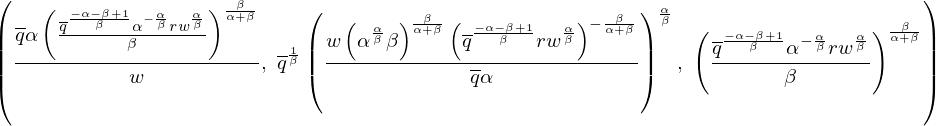

In [12]:
foc_sol[0]

To access the first element in our solution, which is a list by itself, we use the list index again.

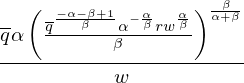

In [16]:
Lstar = foc_sol[0][0].simplify()
Lstar

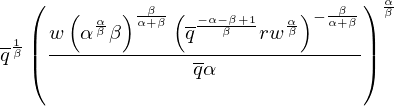

In [17]:
Kstar = foc_sol[0][1].simplify()
Kstar

Substitute optimal input demands into the cost, to calculate the minimum cost level necessary at the given exogenous variables. 

The resulting function is our **cost function**, $C(w,r,\overline{q})$.

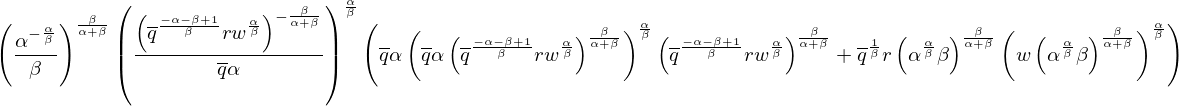

In [18]:
C = (w*L + r*K).subs([(L,Lstar), (K,Kstar)])
# simplify function does not work well here, but we can further simplify by hand
C.simplify()